In [1]:
import numpy as np
import numpy.linalg as LA
from matplotlib import pyplot as plt
from scipy import io

In [2]:
H = 4
sig1 = -0.5j
sig2 = -0.5j
Emin = H-5
Emax = H+5

Pole: (4-1j)


/home/guillaume/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


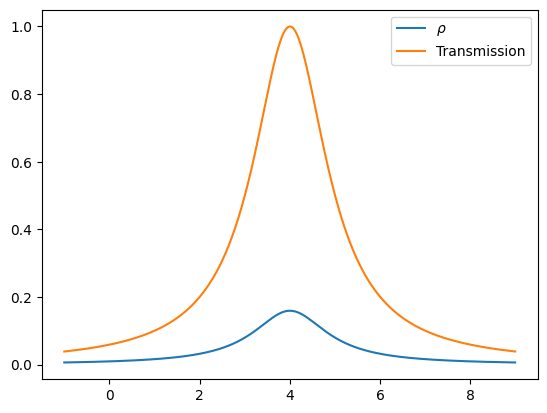

In [3]:
dE = 0.01

Fbar = H + sig1 + sig2
print('Pole:', Fbar)
Gam1 = 1j*(sig1 - np.conj(sig1))
Gam2 = 1j*(sig2 - np.conj(sig2))

Egrid = np.arange(Emin, Emax, dE)
Gr = 1/(Egrid - Fbar)
Ga = np.conj(Gr)
totDen = -1*np.imag(Gr)/(2*np.pi)
T = Gam1*Gr*Gam2*Ga
plt.plot(Egrid, totDen, Egrid, T)
plt.legend((r"$\rho$", "Transmission"))



In [4]:
Efermi = 7
kT = 0.0257
dE = 0.01

# Damle Integral 
log1 = np.log(Efermi-Fbar)-np.log(Efermi-np.conj(Fbar))
log2 = np.log(Emin-Fbar)-np.log(Emin-np.conj(Fbar))
div = (np.conj(Fbar)-Fbar)*2*np.pi
den = (Gam1 + Gam2)*(log2-log1)/div

def func(E, Fbar, Gam):
    Gr = 1/(E-Fbar)
    Ga = 1/(E-np.conj(Fbar))
    #Ga = np.conj(Gr) #THIS CAUSES COMPLEX CONTOUR INTEGRAL TO BE INACCURATE
    return Gr*Gam*Ga

# Direct Integral, at kT
Egrid = np.arange(Emin, Efermi,dE)
rhoL = func(Egrid, Fbar, Gam1)
rhoR = func(Egrid, Fbar, Gam2)
fermi = 1/(1+np.exp((Egrid-Efermi)/kT))
#fermi = np.ones(fermi.shape)*(Egrid<Efermi)
den2 = np.trapz((rhoL+rhoR)*fermi/(2*np.pi), Egrid)

# Contour Integral, at kT
r = (Efermi-Emin)/2
center = (Efermi + Emin)/2
N = int(2*r/dE)
Egrid2 = r*np.exp(1j*np.linspace(0, np.pi, N)) + center
fermi = 1/(1+np.exp(np.real(Egrid2-Efermi)/kT))
#fermi = np.ones(fermi.shape)*(Egrid2.real<Efermi)
rhoL = func(Egrid2, Fbar, Gam1)
rhoR = func(Egrid2, Fbar, Gam2)
f = (rhoL+rhoR)*fermi
#plt.plot(Egrid2, fermi)
lineInt = 0
for i in range(1,N):
    F = (f[i]+f[i-1])/2
    dS = Egrid2[i]-Egrid2[i-1]
    lineInt += F*dS
#print(np.trapz(Egrid2.real, f.real), np.trapz(Egrid2.imag, f.imag))
if abs(Fbar-center)<=r:
    Res = 2*np.pi*1j*(Gam1+Gam2)*(1/(1+np.exp(np.real(Fbar-Efermi)/kT)))/(np.conj(Fbar)-Fbar)
else:
    Res = 0
#print(Res, lineInt)

#Or calculate by taking limit
#lim = 1e-9
#Res = 2*np.pi*1j*func(Fbar+lim, Fbar, Gam1+Gam2)*(-1*lim)/(1+np.exp((Fbar-Efermi)/kT))
#print(Res)
den3 = (Res-lineInt)/(2*np.pi)

print('RESULTS:')
print('Damle:', den)
print('Real Integral:', den2)
print('Residual Theorem:', den3)
#(den, den2, den3)

RESULTS:
Damle: (0.8347506594614322+0j)
Real Integral: (0.8339952712457029+0j)
Residual Theorem: (0.8355434785785376+0.0076781411076689956j)


3.999000000000004

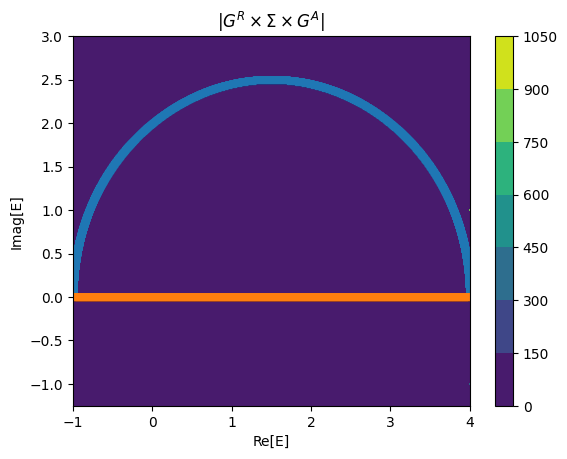

In [100]:
#Plot function in complex axes
realAx = np.linspace(center-r, center+r, 1000)
imagAx = np.linspace(-0.5*r, 1.2*r, 1000)
(X,Y) = np.meshgrid(realAx,imagAx)

Z = X + 1j*Y
func = (1/(Z - Fbar))*(Gam1+Gam2)*(1/(Z-np.conj(Fbar)))/(1+np.exp((np.real(Z)-Efermi)/kT))

plt.plot(Egrid2.real, Egrid2.imag, '-*')
plt.plot(Egrid.real, Egrid.imag, '-*')
plt.contourf(X,Y,abs(func))
plt.xlabel('Re[E]')
plt.ylabel('Imag[E]')
plt.title(r'|$G^R \times \Sigma \times G^A$|')
plt.colorbar()
Egrid[-1]

Contour Integral 1: 2.21429764934868
Contour Integral 2: (0.927297168926013-2.478486166301863e-16j)
Residue * 2 pi i: (3.141592653589793+0j)


(2+0j)

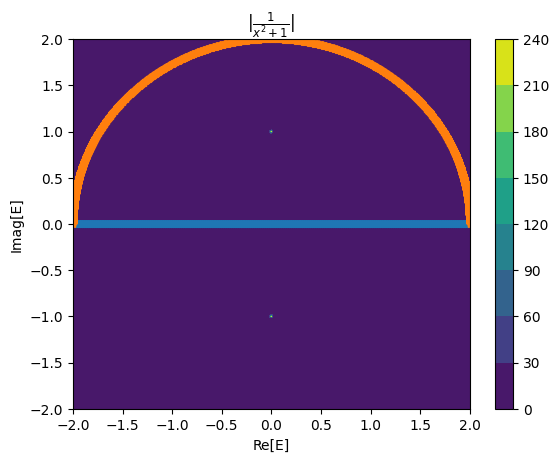

In [93]:
def polefunc(E):
    return 1/(E**2+1)

N = 1000
Egrid = np.linspace(-2, 2, N)
Egrid2 = 2*np.exp(1j*np.linspace(0, np.pi, N))

lineInt1 = 0
lineInt2 = 0
for i in range(1,N):
    E = (Egrid[i]+Egrid[i-1])/2
    dE = (Egrid[i]-Egrid[i-1])
    lineInt1 += polefunc(E)*dE
    E = (Egrid2[i]+Egrid2[i-1])/2
    dE = (Egrid2[i]-Egrid2[i-1])
    lineInt2 += polefunc(E)*dE

#This is wrong:
#lineInt2 = np.trapz(Egrid2.real, polefunc(Egrid2).real) + np.trapz(Egrid2.imag, polefunc(Egrid2).imag)

print("Contour Integral 1:",lineInt1)
print("Contour Integral 2:",lineInt2)
print("Residue * 2 pi i:", 2*np.pi*1j*polefunc(1j+1e-9)*1e-9)

#Plot function in complex axes
(X,Y) = np.meshgrid(Egrid,Egrid)

Z = X + 1j*Y
func = polefunc(Z)

plt.plot(Egrid.real, Egrid.imag, '-*')
plt.plot(Egrid2.real, Egrid2.imag, '-*')
plt.contourf(X,Y,abs(func))
plt.xlabel('Re[E]')
plt.ylabel('Imag[E]')
plt.title(r'$\left|\frac{1}{x^2+1}\right|$')
plt.colorbar()
Egrid2[0]

In [67]:
np.arange(Emin, Efermi, dE)

array([-1.0000000e+00, -9.9000000e-01, -9.8000000e-01, -9.7000000e-01,
       -9.6000000e-01, -9.5000000e-01, -9.4000000e-01, -9.3000000e-01,
       -9.2000000e-01, -9.1000000e-01, -9.0000000e-01, -8.9000000e-01,
       -8.8000000e-01, -8.7000000e-01, -8.6000000e-01, -8.5000000e-01,
       -8.4000000e-01, -8.3000000e-01, -8.2000000e-01, -8.1000000e-01,
       -8.0000000e-01, -7.9000000e-01, -7.8000000e-01, -7.7000000e-01,
       -7.6000000e-01, -7.5000000e-01, -7.4000000e-01, -7.3000000e-01,
       -7.2000000e-01, -7.1000000e-01, -7.0000000e-01, -6.9000000e-01,
       -6.8000000e-01, -6.7000000e-01, -6.6000000e-01, -6.5000000e-01,
       -6.4000000e-01, -6.3000000e-01, -6.2000000e-01, -6.1000000e-01,
       -6.0000000e-01, -5.9000000e-01, -5.8000000e-01, -5.7000000e-01,
       -5.6000000e-01, -5.5000000e-01, -5.4000000e-01, -5.3000000e-01,
       -5.2000000e-01, -5.1000000e-01, -5.0000000e-01, -4.9000000e-01,
       -4.8000000e-01, -4.7000000e-01, -4.6000000e-01, -4.5000000e-01,
      

$ E = E_r + i E_i$

$ G^R = (EI - H - \tau g^R \tau')^{-1}$

$ G^A = (EI - H - \tau g^A \tau')^{-1}$

$ G^A \neq (G^R)'$